## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [76]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor ,export_graphviz
from sklearn.model_selection import train_test_split

In [77]:
boston = datasets.load_boston()
x_train,  x_test , y_train, y_test = train_test_split(boston.data,boston.target,test_size=0.3,random_state = 42)


In [78]:
## 完全不調整參數 MSE = 12
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)
metrics.mean_squared_error(y_test,y_pred)

19.239407894736843

In [79]:
# 誤差提升了
DTR = DecisionTreeRegressor(max_depth=13,criterion='mae', min_samples_split=3,min_weight_fraction_leaf = 0)
DTR.fit(x_train, y_train)
y_pred = DTR.predict(x_test)
metrics.mean_squared_error(y_test,y_pred)

12.52481907894737

### 來試試

In [80]:
wine = datasets.load_wine()
x_train,  x_test , y_train, y_test = train_test_split(wine.data,wine.target,test_size=0.3,random_state = 42)


In [81]:
#參數完全都沒調
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9444444444444444

### 來畫張決策樹吧 
參考資料：https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

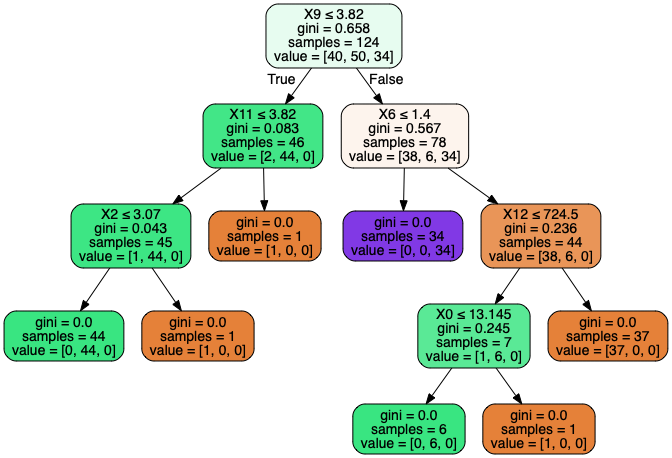

In [85]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())